In [1]:
import torch

## Fundamentals

In [2]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

Each value in the tensor is called an element, we can check the number of elements, this tensor contains 12 elements.

In [3]:
x.numel()

12

We can check the tensor's shape using x.shape, because this is a one-dimensional tensor (a vector) the shape is a scalar equivalent to its size

In [4]:
x.shape

torch.Size([12])

We can change the shape of the tensor by invoking tensor.resize. Note that the elements are laid out in the tensor one row at a time...

The first element in the reshape matrix is the number of rows, the second is the number of columns.

In [5]:
x.reshape([3, 4])

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

Because we already know the size of the tensor, we need not specify all elements of the size each time. If we have a tensor with n elements, we know that if we specify want a target shape (h, w) and specify a height h, the width must be n/w. In such cases we can specify -1, and the dimension will be automatically inferred. 


In [6]:
X = x.reshape([3, -1])
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

Often we have to work with tensors initialised to all zeros or all ones, this can be done with

In [7]:
torch.zeros((3, 4, 5))

tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])

In [8]:
# or

torch.ones((3, 4, 5))

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [9]:
# we often want to sample randomly and independently from a probability distribution function, which can be done with

torch.randn((3, 4, 5))

tensor([[[ 1.4726,  1.4745, -0.8641, -0.6169,  0.4956],
         [-0.4338,  0.0645, -0.2120,  0.7657, -0.9440],
         [-1.0031,  0.5411, -0.9688, -1.4313, -0.7929],
         [ 0.5104, -0.9611,  0.9381, -1.2286,  1.6332]],

        [[ 0.2107,  0.3354,  1.1813,  0.7999,  0.8196],
         [-0.3744, -0.3644,  0.6149, -0.7330,  0.9215],
         [-0.3507,  0.5770,  0.9074, -0.0858, -0.2050],
         [-1.3414, -1.2425, -0.9302,  0.3931, -0.5215]],

        [[-0.1440, -1.2337, -1.2541,  1.0042,  0.0727],
         [-1.0027,  2.1128, -0.2231,  1.5941, -0.9108],
         [-1.5446,  1.3276, -1.0298,  0.1263, -0.2840],
         [-1.1713,  0.4048,  0.1794,  0.3975, -1.1816]]])

In [10]:
# We may also want to specify the elements manually, which can be done by providing a list of lists (nested) presumably this can also be done from a text file or numpy.ndarray

torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

## Slicing

As with python lists, we can access the elements of a tensor by indexing (beginning at zero) and slicing, with X[start:stop] which will return values from start (included) to stop (NOT included).

In [11]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [12]:
X[0]

tensor([0., 1., 2., 3.])

In [13]:
X[1:4]

tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

Beyond reading them, we can also write to them

In [14]:
X[1, 2] = 17

#X [row, column]!

In [15]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

Values can also be set for many elements at once by using slicing on the left hand side of the assignmment operator


In [16]:
X[:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

## Operations

Among the most useful operations which can be performed are element-wise operations. These apply scalar operations individually to each element of a tensor. When a function takes two tensors as an input, element wise operations apply a binary operator on each pair of corresponding inputs. Any function that maps a scalar to a scalar can be broadcast to be applied as an element-wise operation on a tensor. 

We denote a unary scalar operator (one which takes a single tensor as an input) as f: R -> R  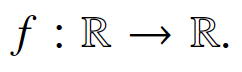 

In [17]:
torch.exp(x)

tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])

a binary scalar operator takes two tensors as input. f: R, R -> R 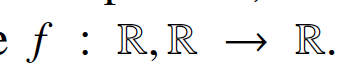

In the example below, the common standard arithmetic operators +, -, *, /, ** have been "lifted" to binary scalar operators for identically shaped tensors of arbitrary shape. 

$f : \mathbb{R}, \mathbb{R} \rightarrow \mathbb{R}$

In [19]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])

x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

It is also possible to concatenate tensors together:

In [24]:
X = torch.arange(12, dtype=torch.float32).reshape(3, 4)
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [25]:
# We can also create a binary tensor via logical statements, for example

X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [27]:
# Summing all the elements of a tensor results in a one-element tensor

X.sum()

tensor(66.)

## Broadcasting

In [29]:
# Under certain conditions, even when shapes differ, binary operations may be carried out on tensors by invoking the broadcasting mechanism. This is done in two steps;
# 1. The elements of one or both arrays are expanded along axes with length 1 so that both arrays have the same shape
# 2. the element-wise binary operation is then carried out.

In [32]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))

a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [33]:
# Since a and b are matrices of different sizes and shapes, the binary operation cannot be carried out without broadcasting. 
# the broadcasting mechanism copies the elements of a and b along both axes to produce two 3x2 arrays, the elements of which are then added element-wise.

In [38]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## Saving Memory

An expression like Y = X + Y is memory inefficient, because memory is deallocated from the first Y variable and reallocated to the tensor on the LHS of the asignment operator. This can be avoided by exlicitly setting the _content_ of the original tensor to be that of the new tensor, using slicing notation Y[:] = X + Y

In [41]:
# In the below example, we use python's .id() method to see that the two memory locations are not the same
original_id = id(Y)
Y = Y + X
new_id = id(Y)

print(original_id)
print(new_id)
print(original_id == new_id)

4708973520
4708974480
False


In [44]:
# However, by using the slicing notation this operation can be performed in-place. Saving memory and preventing accidentally referencing the memory location of stale parameters.
original_id = id(Y)
Y[:] = Y + X
new_id = id(Y)

print(original_id)
print(new_id)
print(original_id == new_id)

4708974480
4708974480
True


In [47]:
# The plus-equal operator can also be used for simple addition operations, as this performs the operation in-place in memory.
print(id(Y))

Y += X

print(id(Y))

4708974480
4708974480


## Conversion to other python objects

Converting back and forth from numpy arrays to torch tensors is easy, and the resulting arrays will share their locations in memory to avoid duplication. 

In [50]:
A = X.numpy()
B = torch.from_numpy(A)

type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [58]:
# To convert a one-size tensor to a python scalar, we can invoke the torch.tensor.item() function or one of python's builtin functions

a = torch.tensor([3.5])

a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## Experimentation

In [66]:
X2 = torch.arange(9, dtype=torch.float32).reshape((3, 3))

In [67]:
X2

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])

In [64]:
X3 = torch.arange(27, dtype=torch.float32).reshape((3, 3, 3))

In [65]:
X3

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.],
         [ 6.,  7.,  8.]],

        [[ 9., 10., 11.],
         [12., 13., 14.],
         [15., 16., 17.]],

        [[18., 19., 20.],
         [21., 22., 23.],
         [24., 25., 26.]]])

In [73]:
# Aiming for 23
print(X3[2, 1, 2])

# So indexing in 3D is like "layer, row, column"

# Aiming for 11
print(X3[1, 0, 2])

tensor(23.)
tensor(11.)
